In [ ]:
#### Code Submitted By ####

#....Synthetic Palm Image Generation by StyleGAN2-ADA and run through SIFT Algorithm to Matching....#

# Md Jahangir Alam Khondkar
# Electrical Engineering
# Clarkson University
# Student ID: 0981046

Algorithm for Image Resize

In [16]:
# Mount the Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


StyleGAN2-ADA in Google Colab

In [ ]:
# Mount the google colab

try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


SIFT Algorithm for Matching

In [17]:
#Import data files
import cv2
import pickle
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os

In [ ]:
#Open CV installation (It is ran smoothly in Open CV version 4.5 and 4.6)
!pip install opencv-python==4.5.4.58

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.3/60.3 MB 10.0 MB/s eta 0:00:00
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.8.0.76
    Uninstalling opencv-python-4.8.0.76:
      Successfully uninstalled opencv-python-4.8.0.76


In [18]:
#Check the open CV version
import cv2
print(cv2.__version__)

4.5.4-dev


In [19]:
#Setup images for measure
def imageResizeTrain(image):
    maxD = 512
    height,width = image.shape
    aspectRatio = width/height
    if aspectRatio < 1:
        newSize = (int(maxD*aspectRatio),maxD)
    else:
        newSize = (maxD,int(maxD/aspectRatio))
    image = cv2.resize(image,newSize)
    return image

def imageResizeTest(image):
    maxD = 512
    height,width,channel = image.shape
    aspectRatio = width/height
    if aspectRatio < 1:
        newSize = (int(maxD*aspectRatio),maxD)
    else:
        newSize = (maxD,int(maxD/aspectRatio))
    image = cv2.resize(image,newSize)
    return image

In [20]:
#Set the direction of data folders
folder_dir = '/content/drive/MyDrive/SIFT_data/data/'
imageList = []

for file in os.listdir(folder_dir):
  if(file.endswith(".jpg")):
    file_name = os.path.basename(folder_dir + '/' + file)
    imageList.append(file_name)

print(imageList)

print(imageList)

len(imageList)

['fakes001000_01.jpg', 'fakes001000_02.jpg', 'fakes001000_04.jpg', 'fakes001000_13.jpg', 'fakes001000_09.jpg', 'fakes001000_14.jpg', 'fakes001000_03.jpg', 'fakes001000_19.jpg', 'fakes001000_12.jpg', 'fakes001000_05.jpg', 'fakes001000_11.jpg', 'fakes001000_16.jpg', 'fakes001000_17.jpg', 'fakes001000_18.jpg', 'fakes001000_08.jpg', 'fakes001000_10.jpg', 'fakes001000_07.jpg', 'fakes001000_06.jpg', 'fakes001000_15.jpg', 'fakes001000_30.jpg', 'fakes001000_33.jpg', 'fakes001000_26.jpg', 'fakes001000_22.jpg', 'fakes001000_27.jpg', 'fakes001000_25.jpg', 'fakes001000_20.jpg', 'fakes001000_28.jpg', 'fakes001000_34.jpg', 'fakes001000_21.jpg', 'fakes001000_35.jpg', 'fakes001000_24.jpg', 'fakes001000_31.jpg', 'fakes001000_32.jpg', 'fakes001000_23.jpg', 'fakes001000_29.jpg', 'fakes001000_38.jpg', 'fakes001000_46.jpg', 'fakes001000_39.jpg', 'fakes001000_47.jpg', 'fakes001000_36.jpg', 'fakes001000_45.jpg', 'fakes001000_40.jpg', 'fakes001000_48.jpg', 'fakes001000_41.jpg', 'fakes001000_54.jpg', 'fakes001

120

In [23]:
imagesBW = []
for imageName in imageList:
    imagePath = "/content/drive/MyDrive/SIFT_data/data/" + str(imageName)
    imagesBW.append(imageResizeTrain(cv2.imread(imagePath,0)))

In [25]:
sift = cv2.SIFT_create()

def computeSIFT(image):
    return sift.detectAndCompute(image, None)

keypoints = []
descriptors = []
i = 0
for image in imagesBW:
    print("Starting for image: " + imageList[i])
    keypointTemp, descriptorTemp = computeSIFT(image)
    keypoints.append(keypointTemp)
    descriptors.append(descriptorTemp)
    print("  Ending for image: " + imageList[i])
    i += 1


Starting for image: fakes001000_01.jpg
  Ending for image: fakes001000_01.jpg
Starting for image: fakes001000_02.jpg
  Ending for image: fakes001000_02.jpg
Starting for image: fakes001000_04.jpg
  Ending for image: fakes001000_04.jpg
Starting for image: fakes001000_13.jpg
  Ending for image: fakes001000_13.jpg
Starting for image: fakes001000_09.jpg
  Ending for image: fakes001000_09.jpg
Starting for image: fakes001000_14.jpg
  Ending for image: fakes001000_14.jpg
Starting for image: fakes001000_03.jpg
  Ending for image: fakes001000_03.jpg
Starting for image: fakes001000_19.jpg
  Ending for image: fakes001000_19.jpg
Starting for image: fakes001000_12.jpg
  Ending for image: fakes001000_12.jpg
Starting for image: fakes001000_05.jpg
  Ending for image: fakes001000_05.jpg
Starting for image: fakes001000_11.jpg
  Ending for image: fakes001000_11.jpg
Starting for image: fakes001000_16.jpg
  Ending for image: fakes001000_16.jpg
Starting for image: fakes001000_17.jpg
  Ending for image: fakes

In [26]:
#Destination setup for Keypoints and descriptors

i = 0
for keypoint in keypoints:
    deserializedKeypoints = []
    filepath = "/content/drive/MyDrive/SIFT_data/keypoints" + str(imageList[i].split('.')[0]) + ".txt"
    for point in keypoint:
        temp = (point.pt, point.size, point.angle, point.response, point.octave, point.class_id)
        deserializedKeypoints.append(temp)
    with open(filepath, 'wb') as fp:
        pickle.dump(deserializedKeypoints, fp)
    i += 1

i = 0
for descriptor in descriptors:
    filepath = "/content/drive/MyDrive/SIFT_data/descriptors" + str(imageList[i].split('.')[0]) + ".txt"
    with open(filepath, 'wb') as fp:
        pickle.dump(descriptor, fp)
    i += 1

def fetchKeypointFromFile(i):
    filepath = "/content/drive/MyDrive/SIFT_data/keypoints" + str(imageList[i].split('.')[0]) + ".txt"
    keypoint = []
    file = open(filepath,'rb')
    deserializedKeypoints = pickle.load(file)
    file.close()
    for point in deserializedKeypoints:
        temp = cv2.KeyPoint(x=point[0][0], y=point[0][1], size=point[1], angle=point[2], response=point[3], octave=point[4], class_id=point[5])
        keypoint.append(temp)
    return keypoint

def fetchDescriptorFromFile(i):
    filepath = "/content/drive/MyDrive/SIFT_data/descriptors" + str(imageList[i].split('.')[0]) + ".txt"
    file = open(filepath,'rb')
    descriptor = pickle.load(file)
    file.close()
    return descriptor

In [27]:
def calculateResultsFor(i,j):
    keypoint1 = fetchKeypointFromFile(i)
    descriptor1 = fetchDescriptorFromFile(i)
    keypoint2 = fetchKeypointFromFile(j)
    descriptor2 = fetchDescriptorFromFile(j)
    matches = calculateMatches(descriptor1, descriptor2)
    score = calculateScore(len(matches),len(keypoint1),len(keypoint2))
    plot = getPlotFor(i,j,keypoint1,keypoint2,matches)
    print(len(matches),len(keypoint1),len(keypoint2),len(descriptor1),len(descriptor2))
    print(score)
    plt.imshow(plot),plt.show()

    return score

def getPlotFor(i,j,keypoint1,keypoint2,matches):
    print(imageList)
    image1 = imageResizeTest(cv2.imread("/content/drive/MyDrive/SIFT_data/data/" + imageList[i]))
    image2 = imageResizeTest(cv2.imread("/content/drive/MyDrive/SIFT_data/data/" + imageList[j]))
    return getPlot(image1,image2,keypoint1,keypoint2,matches)

['fakes001000_01.jpg', 'fakes001000_02.jpg', 'fakes001000_04.jpg', 'fakes001000_13.jpg', 'fakes001000_09.jpg', 'fakes001000_14.jpg', 'fakes001000_03.jpg', 'fakes001000_19.jpg', 'fakes001000_12.jpg', 'fakes001000_05.jpg', 'fakes001000_11.jpg', 'fakes001000_16.jpg', 'fakes001000_17.jpg', 'fakes001000_18.jpg', 'fakes001000_08.jpg', 'fakes001000_10.jpg', 'fakes001000_07.jpg', 'fakes001000_06.jpg', 'fakes001000_15.jpg', 'fakes001000_30.jpg', 'fakes001000_33.jpg', 'fakes001000_26.jpg', 'fakes001000_22.jpg', 'fakes001000_27.jpg', 'fakes001000_25.jpg', 'fakes001000_20.jpg', 'fakes001000_28.jpg', 'fakes001000_34.jpg', 'fakes001000_21.jpg', 'fakes001000_35.jpg', 'fakes001000_24.jpg', 'fakes001000_31.jpg', 'fakes001000_32.jpg', 'fakes001000_23.jpg', 'fakes001000_29.jpg', 'fakes001000_38.jpg', 'fakes001000_46.jpg', 'fakes001000_39.jpg', 'fakes001000_47.jpg', 'fakes001000_36.jpg', 'fakes001000_45.jpg', 'fakes001000_40.jpg', 'fakes001000_48.jpg', 'fakes001000_41.jpg', 'fakes001000_54.jpg', 'fakes001

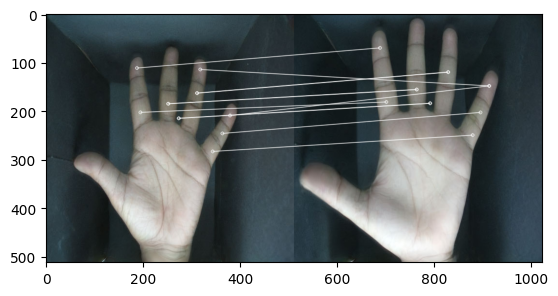

In [29]:
# Result calculation
def calculateScore(matches,keypoint1,keypoint2):
    return 100 * (matches/min(keypoint1,keypoint2))

bf = cv2.BFMatcher()
def calculateMatches(des1,des2):
    matches = bf.knnMatch(des1,des2,k=2)
    topResults1 = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            topResults1.append([m])

    matches = bf.knnMatch(des2,des1,k=2)
    topResults2 = []
    for m,n in matches:
        if m.distance < 0.7*n.distance:
            topResults2.append([m])

    topResults = []
    for match1 in topResults1:
        match1QueryIndex = match1[0].queryIdx
        match1TrainIndex = match1[0].trainIdx

        for match2 in topResults2:
            match2QueryIndex = match2[0].queryIdx
            match2TrainIndex = match2[0].trainIdx

            if (match1QueryIndex == match2TrainIndex) and (match1TrainIndex == match2QueryIndex):
                topResults.append(match1)
    return topResults

def getPlot(image1,image2,keypoint1,keypoint2,matches):
    image1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
    image2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)
    matchPlot = cv2.drawMatchesKnn(image1,keypoint1,image2,keypoint2,matches,None,[255,255,255],flags=2)
    return matchPlot

#Set the images for comparison
calculateResultsFor(10,6)

total_image = len(imageList)